In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(url, sep="\t", header=0)
df = df.drop("Unnamed: 0", axis=1)
istrain_str = df["train"]
istrain = np.asarray([True if s == "T" else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop("train", axis=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled["lpsa"] = df["lpsa"]
X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], "intercept", np.ones(N))
y = df_scaled["lpsa"]
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

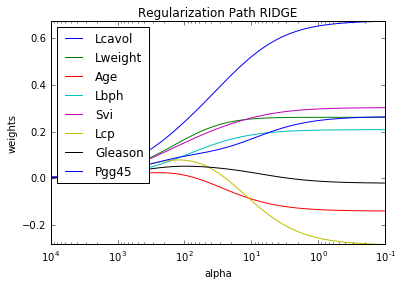

In [18]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
%matplotlib inline

X = X.drop("intercept", axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver="svd")

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Regularization Path RIDGE")
plt.axis("tight")
plt.legend(loc=2)
plt.show()

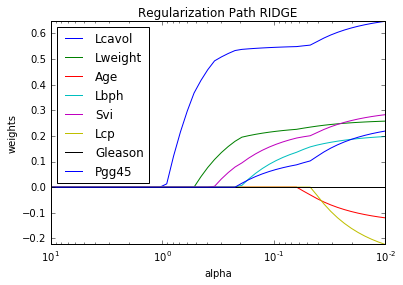

In [19]:
from sklearn.linear_model import Lasso
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-2,base=10)
coefs = []
model = clf = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Regularization Path RIDGE")
plt.axis("tight")
plt.legend(loc=2)
plt.show()

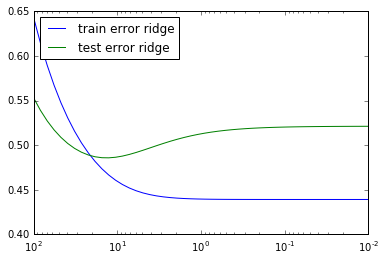

In [20]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label="train error ridge")
ax.plot(alphas_,mse_test,label="test error ridge")
plt.legend(loc=2)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

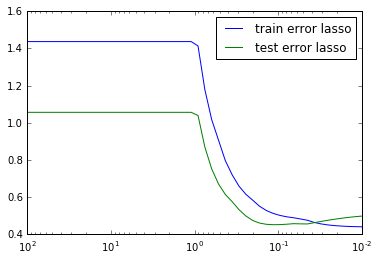

In [21]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(-2,2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label="train error lasso")
ax.plot(alphas_,mse_test,label="test error lasso")
plt.legend()
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

In [22]:
from sklearn import cross_validation
def MSE(y,yhat): 
    return np.mean(np.power(y-yhat,2))

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in k_fold]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "RIDGE: BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

RIDGE: BEST PARAMETER=0.010000, MSE(CV)=0.757182
RIDGE: BEST PARAMETER=0.012068, MSE(CV)=0.757171
RIDGE: BEST PARAMETER=0.014563, MSE(CV)=0.757157
RIDGE: BEST PARAMETER=0.017575, MSE(CV)=0.757140
RIDGE: BEST PARAMETER=0.021210, MSE(CV)=0.757120
RIDGE: BEST PARAMETER=0.025595, MSE(CV)=0.757096
RIDGE: BEST PARAMETER=0.030888, MSE(CV)=0.757067
RIDGE: BEST PARAMETER=0.037276, MSE(CV)=0.757033
RIDGE: BEST PARAMETER=0.044984, MSE(CV)=0.756991
RIDGE: BEST PARAMETER=0.054287, MSE(CV)=0.756941
RIDGE: BEST PARAMETER=0.065513, MSE(CV)=0.756881
RIDGE: BEST PARAMETER=0.079060, MSE(CV)=0.756809
RIDGE: BEST PARAMETER=0.095410, MSE(CV)=0.756724
RIDGE: BEST PARAMETER=0.115140, MSE(CV)=0.756622
RIDGE: BEST PARAMETER=0.138950, MSE(CV)=0.756501
RIDGE: BEST PARAMETER=0.167683, MSE(CV)=0.756358
RIDGE: BEST PARAMETER=0.202359, MSE(CV)=0.756189
RIDGE: BEST PARAMETER=0.244205, MSE(CV)=0.755990
RIDGE: BEST PARAMETER=0.294705, MSE(CV)=0.755759
RIDGE: BEST PARAMETER=0.355648, MSE(CV)=0.755492
RIDGE: BEST PARAMETE

In [16]:
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in k_fold]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "LASSO: BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

LASSO: BEST PARAMETER=0.010000, MSE(CV)=0.758661
